In [4]:
# import numpy as np
import pandas as pd
 
import requests
import os
import datetime
import re
 
import openpyxl
from openpyxl.formatting.rule import ColorScaleRule

In [161]:
import sys
sys.path.append("../")
from index.season.season_index import get_seasons
from product_csv.create_df import game_df

In [5]:
wb = openpyxl.Workbook()
sh = wb.active

In [149]:
os.chdir('/Users/sasno/Desktop/MyPandas/vleague')

division = 'v1_w'
os.chdir(division)
s_round = '2019-20_regular'
yearly_all = pd.read_csv('all/{}/yearly_all.csv'.format(s_round),encoding='cp932')
yearly_all

,名前,チーム,背番号,出場数,アタック打数,アタック得点,アタック失点,アタック決定率,アタック効果率,バックアタック打数,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
0,オクム大庭冬美ハウィ,日立リヴァーレ,17,13,34,16,6,47.1,29.4,0,...,1,0,0,0,20,NaN,1.2,0.2,14.3,NaN
1,オズソイネリマン,トヨタ車体クインシーズ,13,83,1122,470,80,41.9,34.8,392,...,78,0,0,0,523,43.6,5.7,0.4,9.4,NaN
2,カムンタラーケオカラヤー,JTマーヴェラス,8,7,14,7,1,50.0,42.9,1,...,4,0,0,0,7,100.0,1.0,0.0,9.1,NaN
3,クラウジノファビアナ,久光製薬スプリングス,2,77,393,167,23,42.5,36.6,0,...,65,5,3,2,253,NaN,2.2,0.9,11.0,80.0
4,クランヤナ,東レアローズ,7,78,966,406,57,42.0,36.1,114,...,86,40,14,11,463,42.1,5.2,0.5,10.7,48.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,高相みな実,PFUブルーキャッツ,8,31,192,46,8,24.0,19.8,25,...,8,118,42,29,52,24.0,1.5,0.1,5.7,47.9
198,高野由里加,岡山シーガルズ,21,35,88,22,3,25.0,21.6,1,...,2,0,0,0,25,0.0,0.6,0.1,1.9,NaN
199,鴫原ひなた,トヨタ車体クインシーズ,1,49,230,73,30,31.7,18.7,31,...,65,378,151,102,83,35.5,1.5,0.1,11.1,53.4
200,黒後愛,東レアローズ,13,50,382,136,23,35.6,29.6,31,...,37,478,237,105,150,6.5,2.7,0.2,6.3,60.6


## 年間成績

In [150]:
by_team_yearly = yearly_all.groupby(['チーム']).sum().reset_index()
by_team_yearly['アタック決定率'] = ((by_team_yearly['アタック得点'] / by_team_yearly['アタック打数']) * 100).round(1)
by_team_yearly['アタック効果率'] = (((by_team_yearly['アタック得点']-by_team_yearly['アタック失点']) / by_team_yearly['アタック打数']) * 100).round(1)
by_team_yearly['バックアタック決定率'] = ((by_team_yearly['バックアタック得点'] / by_team_yearly['バックアタック打数']) * 100).round(1)
by_team_yearly['アタックセット平均'] = (by_team_yearly['アタック得点'] / by_team_yearly['出場数']).round(2)
by_team_yearly['ブロックセット平均'] = (by_team_yearly['ブロック得点'] / by_team_yearly['出場数']).round(2)
by_team_yearly['サーブ効果率'] = ((by_team_yearly['サーブ得点'] * 100 + by_team_yearly['サーブ効果'] * 25 - by_team_yearly['サーブ失点'] * 25) / by_team_yearly['サーブ打数']).round(1)
by_team_yearly['サーブレシーブ成功率'] = ((by_team_yearly['サーブレシーブ成功・優'] * 100 + by_team_yearly['サーブレシーブ成功・良'] * 50) / by_team_yearly['受数']).round(1)
by_team_yearly.sort_values(['アタック得点'], ascending=False)

,チーム,背番号,出場数,アタック打数,アタック得点,アタック失点,アタック決定率,アタック効果率,バックアタック打数,バックアタック得点,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
9,岡山シーガルズ,298,778,3439,1259,111,36.6,33.4,60,9,...,437,1478,768,333,1419,15.0,1.62,0.15,7.3,63.2
8,埼玉上尾メディックス,173,748,3059,1220,130,39.9,35.6,319,120,...,476,1556,650,403,1476,37.6,1.63,0.24,8.8,54.7
10,日立リヴァーレ,130,767,3264,1208,172,37.0,31.7,197,54,...,468,1667,757,409,1429,27.4,1.57,0.22,7.2,57.7
11,東レアローズ,153,744,2961,1205,184,40.7,34.5,258,84,...,470,1517,685,369,1443,32.6,1.62,0.21,8.9,57.3
0,JTマーヴェラス,146,770,2967,1190,163,40.1,34.6,418,170,...,578,1482,716,360,1462,40.7,1.55,0.23,11.0,60.5
5,トヨタ車体クインシーズ,166,710,3091,1178,216,38.1,31.1,479,195,...,550,1602,643,448,1459,40.7,1.66,0.28,9.8,54.1
4,デンソーエアリービーズ,226,666,3097,1157,156,37.4,32.3,311,87,...,557,1388,606,395,1391,28.0,1.74,0.24,11.0,57.9
7,久光製薬スプリングス,144,738,3098,1069,135,34.5,30.1,159,40,...,458,1599,795,399,1331,25.2,1.45,0.27,9.2,62.2
3,PFUブルーキャッツ,197,780,3050,1012,148,33.2,28.3,234,66,...,422,1630,706,417,1199,28.2,1.30,0.17,7.4,56.1
1,KUROBEアクアフェアリーズ,151,707,2869,1003,177,35.0,28.8,257,91,...,372,1620,599,414,1183,35.4,1.42,0.20,5.8,49.8


In [151]:
# by_team_yearly = by_team_yearly.drop(['背番号', '得セット', '失セット', '勝敗', '出場数'], axis=1)
by_team_yearly = by_team_yearly.set_index('チーム')
by_team_yearly

,背番号,出場数,アタック打数,アタック得点,アタック失点,アタック決定率,アタック効果率,バックアタック打数,バックアタック得点,バックアタック失点,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
チーム,,,,,,,,,,,,,,,,,,,,,
JTマーヴェラス,146,770,2967,1190,163,40.1,34.6,418,170,41,...,578,1482,716,360,1462,40.7,1.55,0.23,11.0,60.5
KUROBEアクアフェアリーズ,151,707,2869,1003,177,35.0,28.8,257,91,23,...,372,1620,599,414,1183,35.4,1.42,0.20,5.8,49.8
NECレッドロケッツ,171,654,2887,991,163,34.3,28.7,228,57,19,...,423,1414,526,379,1175,25.0,1.52,0.20,7.9,50.6
PFUブルーキャッツ,197,780,3050,1012,148,33.2,28.3,234,66,20,...,422,1630,706,417,1199,28.2,1.30,0.17,7.4,56.1
デンソーエアリービーズ,226,666,3097,1157,156,37.4,32.3,311,87,23,...,557,1388,606,395,1391,28.0,1.74,0.24,11.0,57.9
トヨタ車体クインシーズ,166,710,3091,1178,216,38.1,31.1,479,195,62,...,550,1602,643,448,1459,40.7,1.66,0.28,9.8,54.1
ヴィクトリーナ姫路,283,631,2885,989,183,34.3,27.9,325,118,40,...,355,1561,593,387,1135,36.3,1.57,0.16,7.1,50.4
久光製薬スプリングス,144,738,3098,1069,135,34.5,30.1,159,40,17,...,458,1599,795,399,1331,25.2,1.45,0.27,9.2,62.2
埼玉上尾メディックス,173,748,3059,1220,130,39.9,35.6,319,120,27,...,476,1556,650,403,1476,37.6,1.63,0.24,8.8,54.7


In [152]:
by_team_yearly_comp = by_team_yearly[['アタック決定率', 'アタック効果率', 'バックアタック決定率', 'アタックセット平均', 'ブロックセット平均','サーブ効果率', 'サーブレシーブ成功率']]
by_team_yearly_comp

,アタック決定率,アタック効果率,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
チーム,,,,,,,
JTマーヴェラス,40.1,34.6,40.7,1.55,0.23,11.0,60.5
KUROBEアクアフェアリーズ,35.0,28.8,35.4,1.42,0.20,5.8,49.8
NECレッドロケッツ,34.3,28.7,25.0,1.52,0.20,7.9,50.6
PFUブルーキャッツ,33.2,28.3,28.2,1.30,0.17,7.4,56.1
デンソーエアリービーズ,37.4,32.3,28.0,1.74,0.24,11.0,57.9
トヨタ車体クインシーズ,38.1,31.1,40.7,1.66,0.28,9.8,54.1
ヴィクトリーナ姫路,34.3,27.9,36.3,1.57,0.16,7.1,50.4
久光製薬スプリングス,34.5,30.1,25.2,1.45,0.27,9.2,62.2
埼玉上尾メディックス,39.9,35.6,37.6,1.63,0.24,8.8,54.7


In [153]:
compare_list = ['アタック決定率', 'アタック効果率', 'バックアタック決定率', 'アタックセット平均', 'ブロックセット平均','サーブ効果率', 'サーブレシーブ成功率']

In [157]:
for i in compare_list:
    compare = by_team_yearly_comp[i]
    mean = compare.mean()
    print(mean)
    std = compare.std(ddof=0)
    print(std)
    by_team_yearly_dv[i] = compare.map(lambda x: round((x - mean) / std * 10 + 50))
    
by_team_yearly_dv

36.75833333333333
2.446241448063176
31.41666666666666
2.5832258042137077
31.008333333333336
7.2869127360098265
1.554166666666667
0.11375839407367802
0.2141666666666667
0.0392552190443796
8.450000000000001
1.5505375411987505
56.208333333333336
4.305705194532276


,アタック決定率,アタック効果率,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
チーム,,,,,,,
JTマーヴェラス,64.0,62.0,63.0,50.0,54.0,66.0,60.0
KUROBEアクアフェアリーズ,43.0,40.0,56.0,38.0,46.0,33.0,35.0
NECレッドロケッツ,40.0,39.0,42.0,47.0,46.0,46.0,37.0
PFUブルーキャッツ,35.0,38.0,46.0,28.0,39.0,43.0,50.0
デンソーエアリービーズ,53.0,53.0,46.0,66.0,57.0,66.0,54.0
トヨタ車体クインシーズ,55.0,49.0,63.0,59.0,67.0,59.0,45.0
ヴィクトリーナ姫路,40.0,36.0,57.0,51.0,36.0,41.0,37.0
久光スプリングス,NaN,NaN,NaN,NaN,NaN,NaN,NaN
埼玉上尾メディックス,63.0,66.0,59.0,57.0,57.0,52.0,46.0


In [155]:
by_team_yearly_rank = by_team_yearly_dv.rank(ascending=False)
by_team_yearly_rank

,アタック決定率,アタック効果率,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
チーム,,,,,,,
JTマーヴェラス,2.0,2.5,1.5,8.0,4.0,1.5,2.0
KUROBEアクアフェアリーズ,8.0,8.0,5.0,10.0,7.5,11.0,11.0
NECレッドロケッツ,9.5,9.0,10.0,9.0,7.5,6.0,9.5
PFUブルーキャッツ,11.0,10.0,7.5,11.0,9.0,7.5,6.0
デンソーエアリービーズ,5.0,5.0,7.5,1.0,2.5,1.5,3.0
トヨタ車体クインシーズ,4.0,7.0,1.5,2.0,1.0,3.0,8.0
ヴィクトリーナ姫路,9.5,11.0,4.0,6.5,10.0,10.0,9.5
久光スプリングス,NaN,NaN,NaN,NaN,NaN,NaN,NaN
埼玉上尾メディックス,3.0,1.0,3.0,3.0,2.5,5.0,7.0


In [156]:
by_team_yearly_rank_t = by_team_yearly_rank.T
by_team_yearly_rank_t

チーム,JTマーヴェラス,KUROBEアクアフェアリーズ,NECレッドロケッツ,PFUブルーキャッツ,デンソーエアリービーズ,トヨタ車体クインシーズ,ヴィクトリーナ姫路,久光スプリングス,埼玉上尾メディックス,岡山シーガルズ,日立リヴァーレ,東レアローズ
アタック決定率,2.0,8.0,9.5,11.0,5.0,4.0,9.5,NaN,3.0,7.0,6.0,1.0
アタック効果率,2.5,8.0,9.0,10.0,5.0,7.0,11.0,NaN,1.0,4.0,6.0,2.5
バックアタック決定率,1.5,5.0,10.0,7.5,7.5,1.5,4.0,NaN,3.0,11.0,9.0,6.0
アタックセット平均,8.0,10.0,9.0,11.0,1.0,2.0,6.5,NaN,3.0,4.5,6.5,4.5
ブロックセット平均,4.0,7.5,7.5,9.0,2.5,1.0,10.0,NaN,2.5,11.0,5.0,6.0
サーブ効果率,1.5,11.0,6.0,7.5,1.5,3.0,10.0,NaN,5.0,7.5,9.0,4.0
サーブレシーブ成功率,2.0,11.0,9.5,6.0,3.0,8.0,9.5,NaN,7.0,1.0,4.5,4.5


In [160]:
team_ranking = by_team_yearly_rank_t.to_dict()
team_ranking

{'JTマーヴェラス': {'アタック決定率': 2.0,
  'アタック効果率': 2.5,
  'バックアタック決定率': 1.5,
  'アタックセット平均': 8.0,
  'ブロックセット平均': 4.0,
  'サーブ効果率': 1.5,
  'サーブレシーブ成功率': 2.0},
 'KUROBEアクアフェアリーズ': {'アタック決定率': 8.0,
  'アタック効果率': 8.0,
  'バックアタック決定率': 5.0,
  'アタックセット平均': 10.0,
  'ブロックセット平均': 7.5,
  'サーブ効果率': 11.0,
  'サーブレシーブ成功率': 11.0},
 'NECレッドロケッツ': {'アタック決定率': 9.5,
  'アタック効果率': 9.0,
  'バックアタック決定率': 10.0,
  'アタックセット平均': 9.0,
  'ブロックセット平均': 7.5,
  'サーブ効果率': 6.0,
  'サーブレシーブ成功率': 9.5},
 'PFUブルーキャッツ': {'アタック決定率': 11.0,
  'アタック効果率': 10.0,
  'バックアタック決定率': 7.5,
  'アタックセット平均': 11.0,
  'ブロックセット平均': 9.0,
  'サーブ効果率': 7.5,
  'サーブレシーブ成功率': 6.0},
 'デンソーエアリービーズ': {'アタック決定率': 5.0,
  'アタック効果率': 5.0,
  'バックアタック決定率': 7.5,
  'アタックセット平均': 1.0,
  'ブロックセット平均': 2.5,
  'サーブ効果率': 1.5,
  'サーブレシーブ成功率': 3.0},
 'トヨタ車体クインシーズ': {'アタック決定率': 4.0,
  'アタック効果率': 7.0,
  'バックアタック決定率': 1.5,
  'アタックセット平均': 2.0,
  'ブロックセット平均': 1.0,
  'サーブ効果率': 3.0,
  'サーブレシーブ成功率': 8.0},
 'ヴィクトリーナ姫路': {'アタック決定率': 9.5,
  'アタック効果率': 11.0,
  'バックアタック決定率': 4.0,
  'アタックセット平均': 6.

In [128]:
# import re
p = re.compile('[\u0000-\u007F]+')

In [132]:
import tweepy
import os
import glob
import time
# import numpy as np
# import pandas as pd
# import re
 
# key
consumer_key = 'D4OAzhqT7NNeeCa9R7h0Hxzx3'
consumer_secret = 'Py8P1k5jxdPEvNOb64WUXh8b10sfDL5qr60krVLNOOLEXauZti'
access_token = '1309887734555668481-NNvdk0MCxK4WwKZCKZrOqflU9bwPfG'
access_secret = 'CmkMLM4eiOq4MLP3TE6FfUobThOElR5OAfuVSv3GRnXrJ'
 
# Twitterオブジェクト
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True)

In [139]:
if division == 'v1_m':
    division_j = 'V1男子'
elif division == 'v1_w':
    division_j = 'V1女子'
elif division == 'v2_m':
    division_j = 'V2男子'
elif division == 'v2_w':
    division_j = 'V2女子'
elif division == 'v3_m':
    division_j = 'V3男子'
else:
    division_j = 'V3女子'

In [159]:
for team, stats in team_ranking.items():
    message = "チーム別成績\n"
    message += "シーズン: {}\n".format(s_round)
    message += "ディビジョン: #{}\n".format(division_j)
    message += "チーム: #{}\n".format(team)
    for i, rank in stats.items():
        message += "{}: {}位\n".format(i, int(rank))
    print(message)
    e_len = len(''.join(p.findall(message)))
    tweet_len = len(message) - (e_len/2)
    print(tweet_len)
#     if tweet_len <= 140:
#         api.update_status(message)

チーム別成績
シーズン: 2019-20_regular
ディビジョン: #V1女子
チーム: #JTマーヴェラス
アタック決定率: 2位
アタック効果率: 2位
バックアタック決定率: 1位
アタックセット平均: 5位
ブロックセット平均: 8位
サーブ効果率: 4位
サーブレシーブ成功率: 1位

121.5
チーム別成績
シーズン: 2019-20_regular
ディビジョン: #V1女子
チーム: #KUROBEアクアフェアリーズ
アタック決定率: 11位
アタック効果率: 11位
バックアタック決定率: 3位
アタックセット平均: 11位
ブロックセット平均: 9位
サーブ効果率: 10位
サーブレシーブ成功率: 12位

129.0
チーム別成績
シーズン: 2019-20_regular
ディビジョン: #V1女子
チーム: #NECレッドロケッツ
アタック決定率: 3位
アタック効果率: 3位
バックアタック決定率: 2位
アタックセット平均: 1位
ブロックセット平均: 4位
サーブ効果率: 6位
サーブレシーブ成功率: 8位

123.0
チーム別成績
シーズン: 2019-20_regular
ディビジョン: #V1女子
チーム: #PFUブルーキャッツ
アタック決定率: 12位
アタック効果率: 12位
バックアタック決定率: 8位
アタックセット平均: 12位
ブロックセット平均: 11位
サーブ効果率: 11位
サーブレシーブ成功率: 10位

126.0
チーム別成績
シーズン: 2019-20_regular
ディビジョン: #V1女子
チーム: #デンソーエアリービーズ
アタック決定率: 4位
アタック効果率: 4位
バックアタック決定率: 5位
アタックセット平均: 3位
ブロックセット平均: 5位
サーブ効果率: 5位
サーブレシーブ成功率: 2位

125.5
チーム別成績
シーズン: 2019-20_regular
ディビジョン: #V1女子
チーム: #トヨタ車体クインシーズ
アタック決定率: 10位
アタック効果率: 10位
バックアタック決定率: 8位
アタックセット平均: 6位
ブロックセット平均: 1位
サーブ効果率: 3位
サーブレシーブ成功率: 11位

127.0
チーム別成績
シーズン: 2019-20_

In [85]:
# 標準偏差
std = by_team_yearly_comp.std(ddof=0)
std

アタック決定率       3.132923
アタック効果率       3.764850
バックアタック決定率    5.078550
アタックセット平均     0.139573
ブロックセット平均     0.039817
サーブ効果率        1.280842
サーブレシーブ成功率    2.985195
dtype: float64

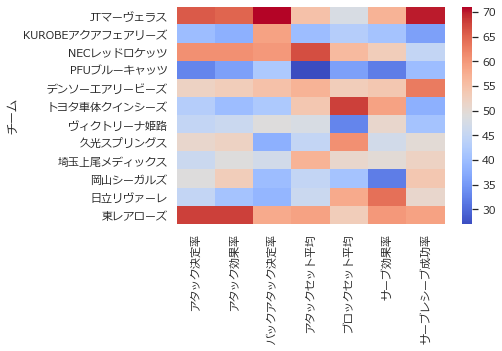

In [148]:
sns.set(font="meiryo")
sns.heatmap(by_team_yearly_dv, cmap="coolwarm")
plt.savefig("all/{}/heatmap.png".format(s_round), bbox_inches="tight")

### 使わないデータ処理

In [55]:
player_count = yearly_all.groupby(['チーム']).count()[['背番号']]
player_count = player_count.rename({'背番号':'player_count'}, axis='columns')
player_count

,player_count
チーム,
JTマーヴェラス,17
KUROBEアクアフェアリーズ,15
NECレッドロケッツ,17
PFUブルーキャッツ,16
デンソーエアリービーズ,17
トヨタ車体クインシーズ,18
ヴィクトリーナ姫路,18
久光スプリングス,18
埼玉上尾メディックス,18


In [56]:
by_team_yearly = pd.merge(by_team_yearly, player_count, on='チーム')
by_team_yearly

,チーム,背番号,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,アタック失点,アタック決定率,...,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率,player_count
0,JTマーヴェラス,164,560,210,168,546,2201,920,103,41.8,...,1073,564,236,1081,41.7,1.68,0.20,9.5,63.6,17
1,KUROBEアクアフェアリーズ,186,308,602,56,597,2603,875,175,33.6,...,1377,531,411,1021,35.3,1.47,0.18,7.4,53.5,15
2,NECレッドロケッツ,170,602,280,182,558,2558,1031,120,40.3,...,1204,527,299,1217,36.0,1.85,0.23,8.9,56.2,17
3,PFUブルーキャッツ,189,166,582,28,517,2120,669,110,31.6,...,1157,484,301,780,26.6,1.29,0.15,6.3,54.8,16
4,デンソーエアリービーズ,216,490,266,140,499,2284,851,106,37.3,...,1056,532,236,1010,33.2,1.71,0.22,9.1,61.6,17
5,トヨタ車体クインシーズ,202,336,504,84,506,2423,838,166,34.6,...,1287,539,314,1041,26.9,1.66,0.28,9.7,54.1,18
6,ヴィクトリーナ姫路,177,294,700,42,672,3011,1060,155,35.2,...,1482,665,304,1213,30.3,1.58,0.14,8.7,55.1,18
7,久光スプリングス,203,448,490,112,616,2553,949,123,37.2,...,1369,636,307,1156,25.0,1.54,0.25,8.2,57.7,18
8,埼玉上尾メディックス,213,448,406,126,554,2648,944,117,35.6,...,1242,584,279,1112,29.3,1.70,0.21,8.6,58.3,18
9,岡山シーガルズ,372,462,420,140,650,2733,998,107,36.5,...,1259,626,234,1134,26.0,1.54,0.17,6.2,59.0,22


In [57]:
by_team_yearly['背番号'] /= by_team_yearly['player_count']
by_team_yearly

,チーム,背番号,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,アタック失点,アタック決定率,...,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率,player_count
0,JTマーヴェラス,9.647059,560,210,168,546,2201,920,103,41.8,...,1073,564,236,1081,41.7,1.68,0.20,9.5,63.6,17
1,KUROBEアクアフェアリーズ,12.400000,308,602,56,597,2603,875,175,33.6,...,1377,531,411,1021,35.3,1.47,0.18,7.4,53.5,15
2,NECレッドロケッツ,10.000000,602,280,182,558,2558,1031,120,40.3,...,1204,527,299,1217,36.0,1.85,0.23,8.9,56.2,17
3,PFUブルーキャッツ,11.812500,166,582,28,517,2120,669,110,31.6,...,1157,484,301,780,26.6,1.29,0.15,6.3,54.8,16
4,デンソーエアリービーズ,12.705882,490,266,140,499,2284,851,106,37.3,...,1056,532,236,1010,33.2,1.71,0.22,9.1,61.6,17
5,トヨタ車体クインシーズ,11.222222,336,504,84,506,2423,838,166,34.6,...,1287,539,314,1041,26.9,1.66,0.28,9.7,54.1,18
6,ヴィクトリーナ姫路,9.833333,294,700,42,672,3011,1060,155,35.2,...,1482,665,304,1213,30.3,1.58,0.14,8.7,55.1,18
7,久光スプリングス,11.277778,448,490,112,616,2553,949,123,37.2,...,1369,636,307,1156,25.0,1.54,0.25,8.2,57.7,18
8,埼玉上尾メディックス,11.833333,448,406,126,554,2648,944,117,35.6,...,1242,584,279,1112,29.3,1.70,0.21,8.6,58.3,18
9,岡山シーガルズ,16.909091,462,420,140,650,2733,998,107,36.5,...,1259,626,234,1134,26.0,1.54,0.17,6.2,59.0,22


In [8]:
monthly_all = pd.read_csv('all/{}/monthly_all.csv'.format(s_round),encoding='cp932')
monthly_all

,名前,年月,チーム,背番号,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
0,アキンラデウォフォルケ,2020-10,久光スプリングス,16,9,4,3,10,52,25,...,10,0,0,0,31,0.0,2.50,0.50,8.6,NaN
1,アキンラデウォフォルケ,2020-11,久光スプリングス,16,11,13,2,24,142,67,...,15,10,3,3,87,NaN,2.79,0.58,11.1,45.0
2,アキンラデウォフォルケ,2020-12,久光スプリングス,16,3,4,1,7,33,17,...,4,2,1,0,26,NaN,2.43,1.00,8.3,50.0
3,アキンラデウォフォルケ,2021-01,久光スプリングス,16,11,11,3,22,104,52,...,24,1,0,0,79,NaN,2.36,1.00,16.0,0.0
4,アキンラデウォフォルケ,2021-02,久光スプリングス,16,5,4,1,9,55,31,...,8,0,0,0,42,NaN,3.44,1.11,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,齋藤加奈子,2020-10,日立リヴァーレ,7,6,10,2,3,0,0,...,0,7,2,2,0,NaN,0.00,0.00,NaN,42.9
900,齋藤加奈子,2020-11,日立リヴァーレ,7,8,20,1,21,0,0,...,1,56,33,12,0,NaN,0.00,0.00,3.6,69.6
901,齋藤加奈子,2020-12,日立リヴァーレ,7,4,3,1,7,0,0,...,0,30,20,7,0,NaN,0.00,0.00,NaN,78.3
902,齋藤加奈子,2021-01,日立リヴァーレ,7,6,9,1,13,0,0,...,0,55,19,15,0,NaN,0.00,0.00,NaN,48.2


## 月間成績

In [23]:
by_team_monthly = monthly_all.groupby(['チーム', '年月']).sum().reset_index()
by_team_monthly['アタック決定率'] = ((by_team_monthly['アタック得点'] / by_team_monthly['アタック打数']) * 100).round(1)
by_team_monthly['アタック効果率'] = (((by_team_monthly['アタック得点']-by_team_monthly['アタック失点']) / by_team_monthly['アタック打数']) * 100).round(1)
by_team_monthly['バックアタック決定率'] = ((by_team_monthly['バックアタック得点'] / by_team_monthly['バックアタック打数']) * 100).round(1)
by_team_monthly['アタックセット平均'] = (by_team_monthly['アタック得点'] / by_team_monthly['出場数']).round(2)
by_team_monthly['ブロックセット平均'] = (by_team_monthly['ブロック得点'] / by_team_monthly['出場数']).round(2)
by_team_monthly['サーブ効果率'] = ((by_team_monthly['サーブ得点'] * 100 + by_team_monthly['サーブ効果'] * 25 - by_team_monthly['サーブ失点'] * 25) / by_team_monthly['サーブ打数']).round(1)
by_team_monthly['サーブレシーブ成功率'] = ((by_team_monthly['サーブレシーブ成功・優'] * 100 + by_team_monthly['サーブレシーブ成功・良'] * 50) / by_team_monthly['受数']).round(1)
by_team_monthly = by_team_monthly.sort_values(['チーム', '年月'])
by_team_monthly

,チーム,年月,背番号,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,アタック失点,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
0,JTマーヴェラス,2020-10,113,140,56,42,141,609,242,33,...,98,295,153,59,284,37.8,1.72,0.17,10.5,61.9
1,JTマーヴェラス,2020-11,134,266,98,84,257,995,404,54,...,185,481,227,122,491,39.7,1.57,0.25,9.6,59.9
2,JTマーヴェラス,2020-12,132,84,0,28,59,264,123,8,...,48,120,82,10,136,57.1,2.08,0.14,9.3,72.5
3,JTマーヴェラス,2021-01,138,112,70,28,129,472,215,15,...,77,248,130,65,247,50.0,1.67,0.16,8.3,65.5
4,JTマーヴェラス,2021-02,129,126,70,42,139,527,210,26,...,110,264,125,46,265,48.1,1.51,0.30,9.8,56.1
5,KUROBEアクアフェアリーズ,2020-10,186,56,196,14,161,769,238,51,...,97,379,166,106,279,32.9,1.48,0.19,7.1,57.8
6,KUROBEアクアフェアリーズ,2020-11,166,182,154,42,219,905,340,56,...,149,488,187,135,393,40.8,1.55,0.16,8.8,52.2
7,KUROBEアクアフェアリーズ,2020-12,165,28,84,0,79,290,97,20,...,38,179,47,66,122,32.1,1.23,0.23,7.0,44.7
8,KUROBEアクアフェアリーズ,2021-01,186,56,210,0,176,796,253,55,...,104,416,151,135,287,31.0,1.44,0.15,5.8,52.5
9,KUROBEアクアフェアリーズ,2021-02,176,14,84,0,64,235,73,13,...,34,158,45,53,97,33.3,1.14,0.31,7.8,45.3


In [10]:
by_team_monthly.groupby(["チーム", "年月"]).sum()[["アタック決定率"]]

アタック決定率
チーム             年月              
JTマーヴェラス        2020-10     39.7
                2020-11     40.6
                2020-12     46.6
                2021-01     45.6
                2021-02     39.8
KUROBEアクアフェアリーズ 2020-10     30.9
                2020-11     37.6
                2020-12     33.4
                2021-01     31.8
                2021-02     31.1
NECレッドロケッツ      2020-10     40.3
                2020-11     39.1
                2020-12     39.8
                2021-01     42.3
                2021-02     40.4
PFUブルーキャッツ      2020-10     32.2
                2020-11     32.1
                2020-12     30.2
                2021-01     33.4
                2021-02     40.2
デンソーエアリービーズ     2020-10     37.2
                2020-11     36.9
                2020-12     38.3
                2021-01     37.3
                2021-02     38.0
トヨタ車体クインシーズ     2020-10     29.0
                2020-11     36.1
                2020-12     36.4
                2021-01     33.9
                2021-02     31.5
ヴィクトリーナ姫路       2020-10     33.9
                2020-11     34.4
                2020-12     40.8
                2021-01     34.6
                2021-02     38.3
久光スプリングス        2020-10     37.4
                2020-11     37.3
                2020-12     34.6
                2021-01     37.5
                2021-02     34.7
埼玉上尾メディックス      2020-10     33.3
                2020-11     36.5
                2020-12     35.1
                2021-01     38.3
                2021-02     41.7
岡山シーガルズ         2020-10     35.7
                2020-11     36.9
                2020-12     34.9
                2021-01     36.3
                2021-02     31.7
日立リヴァーレ         2020-10     39.0
                2020-11     33.5
                2020-12     32.7
                2021-01     34.3
                2021-02     36.1
東レアローズ          2020-10     43.8
                2020-11     42.9
                2020-12     40.6
                2021-01     41.7
                2021-02     44.0

In [11]:
graph_data = pd.pivot_table(by_team_monthly, index="年月", columns="チーム", values="アタック決定率")
graph_data

チーム,JTマーヴェラス,KUROBEアクアフェアリーズ,NECレッドロケッツ,PFUブルーキャッツ,デンソーエアリービーズ,トヨタ車体クインシーズ,ヴィクトリーナ姫路,久光スプリングス,埼玉上尾メディックス,岡山シーガルズ,日立リヴァーレ,東レアローズ
年月,,,,,,,,,,,,
2020-10,39.7,30.9,40.3,32.2,37.2,29.0,33.9,37.4,33.3,35.7,39.0,43.8
2020-11,40.6,37.6,39.1,32.1,36.9,36.1,34.4,37.3,36.5,36.9,33.5,42.9
2020-12,46.6,33.4,39.8,30.2,38.3,36.4,40.8,34.6,35.1,34.9,32.7,40.6
2021-01,45.6,31.8,42.3,33.4,37.3,33.9,34.6,37.5,38.3,36.3,34.3,41.7
2021-02,39.8,31.1,40.4,40.2,38.0,31.5,38.3,34.7,41.7,31.7,36.1,44.0


In [12]:
team = "東レアローズ"
team_monthly = by_team_monthly[by_team_monthly['チーム']==team]
team_monthly

,チーム,年月,背番号,得セット,失セット,勝敗,出場数,アタック打数,アタック得点,アタック失点,...,サーブ効果,受数,サーブレシーブ成功・優,サーブレシーブ成功・良,総得点,バックアタック決定率,アタックセット平均,ブロックセット平均,サーブ効果率,サーブレシーブ成功率
55,東レアローズ,2020-10,120,168,0,56,113,452,198,17,...,105,194,91,52,244,34.8,1.75,0.27,11.2,25.6
56,東レアローズ,2020-11,120,294,98,98,257,1036,444,46,...,180,501,252,112,523,29.0,1.73,0.18,10.3,179.1
57,東レアローズ,2020-12,120,84,14,28,70,278,113,8,...,37,116,42,35,132,33.3,1.61,0.21,5.0,inf
58,東レアローズ,2021-01,117,210,28,70,152,645,269,33,...,94,328,165,68,335,41.6,1.77,0.27,9.6,inf
59,東レアローズ,2021-02,117,126,14,42,96,368,162,20,...,82,183,61,61,202,39.0,1.69,0.28,11.9,703.8


In [13]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots
import squarify

import datetime

# import japanize_matplotlib

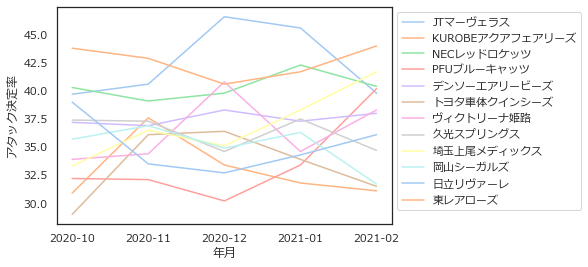

In [17]:
sns.set(style="white", font="meiryo")
ax= sns.lineplot(data=by_team_monthly, x="年月", y="アタック決定率", hue="チーム", palette="pastel")

ax.legend(loc="best", bbox_to_anchor=(1, 1))

In [20]:
graph_data

チーム,JTマーヴェラス,KUROBEアクアフェアリーズ,NECレッドロケッツ,PFUブルーキャッツ,デンソーエアリービーズ,トヨタ車体クインシーズ,ヴィクトリーナ姫路,久光スプリングス,埼玉上尾メディックス,岡山シーガルズ,日立リヴァーレ,東レアローズ
年月,,,,,,,,,,,,
2020-10,39.7,30.9,40.3,32.2,37.2,29.0,33.9,37.4,33.3,35.7,39.0,43.8
2020-11,40.6,37.6,39.1,32.1,36.9,36.1,34.4,37.3,36.5,36.9,33.5,42.9
2020-12,46.6,33.4,39.8,30.2,38.3,36.4,40.8,34.6,35.1,34.9,32.7,40.6
2021-01,45.6,31.8,42.3,33.4,37.3,33.9,34.6,37.5,38.3,36.3,34.3,41.7
2021-02,39.8,31.1,40.4,40.2,38.0,31.5,38.3,34.7,41.7,31.7,36.1,44.0


In [26]:
by_team_yearly.to_csv('all/{}/by_team_yearly.csv'.format(s_round), index=False, encoding='cp932')
by_team_monthly.to_csv('all/{}/by_team_monthly.csv'.format(s_round), index=False, encoding='cp932')